In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'
os.environ['TF_ENABLE_CUDNN_OPTS'] = '0'
os.environ['DEEPREG_LOG_LEVEL'] = '3'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import losses
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np



print()
print('TensorFlow version : ',tf.version.VERSION)
print()



TensorFlow version :  2.16.1



In [2]:
# Hide GPU from visible devices
tf.config.set_visible_devices([], 'GPU')

In [3]:
# Loading model
test_model = tf.keras.models.load_model('model_save/model_conv_fc.keras')
test_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       100,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 324,863 (1.24 MB)

 Trainable params: 108,287 (423.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 216,576 (846.00 KB)

In [4]:
# upload images
 
test_image = tf.keras.utils.image_dataset_from_directory(
    directory='vegetabel',        
    labels = None,         
    label_mode = None,   
    color_mode= 'rgb',          
    batch_size = None,      
    image_size= (224, 224) , 
    shuffle = None,               
    seed = None,                  
    validation_split = None,      
    subset = None,              
    crop_to_aspect_ratio = False, 
    pad_to_aspect_ratio = True,   
    verbose = True) 


Found 8 files.


In [5]:
# moralizează imaginația
X = []
for im in test_image:
    im= tf.cast(im, tf.float32)/255
    X.append(im.numpy())

X = np.array(X)

print(X.shape)

(8, 224, 224, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step





I0000 00:00:1752788383.462534  562559 service.cc:145] XLA service 0x7010600085c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752788383.462557  562559 service.cc:153]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1752788383.525007  562559 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


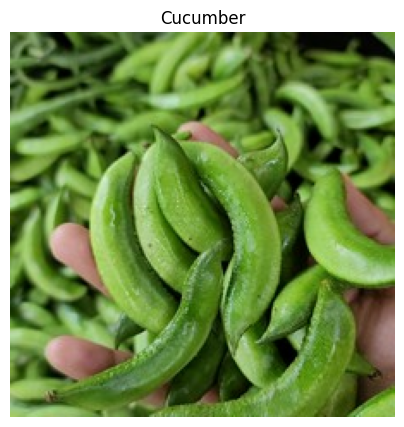

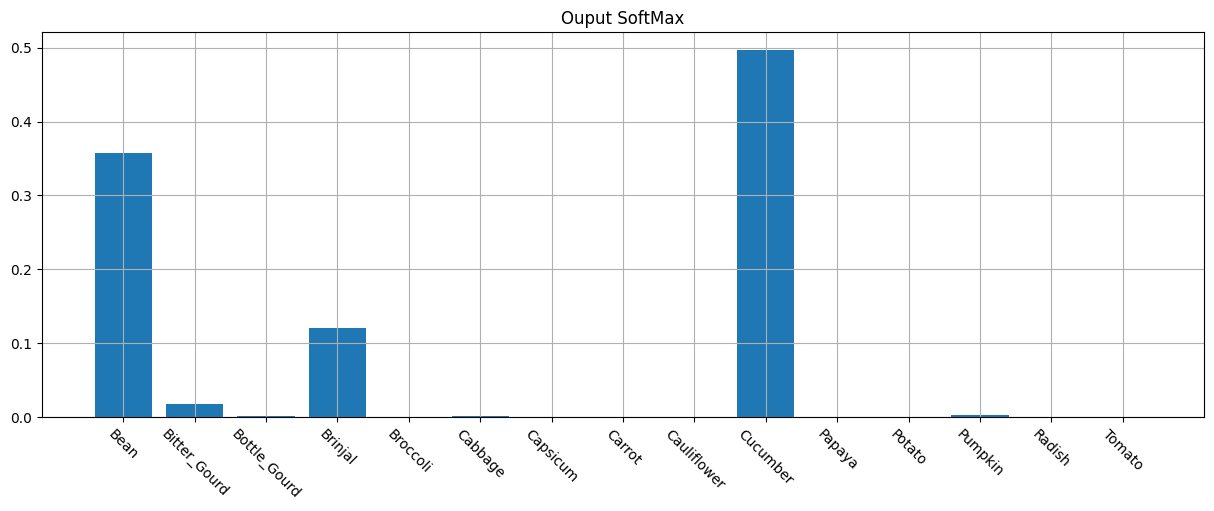

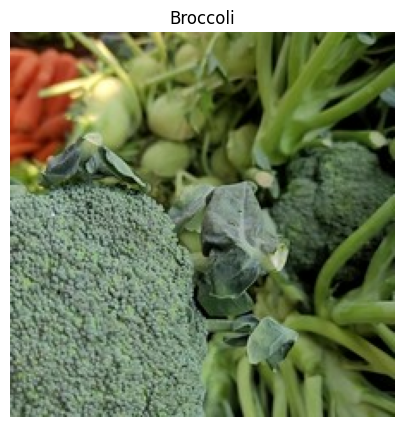

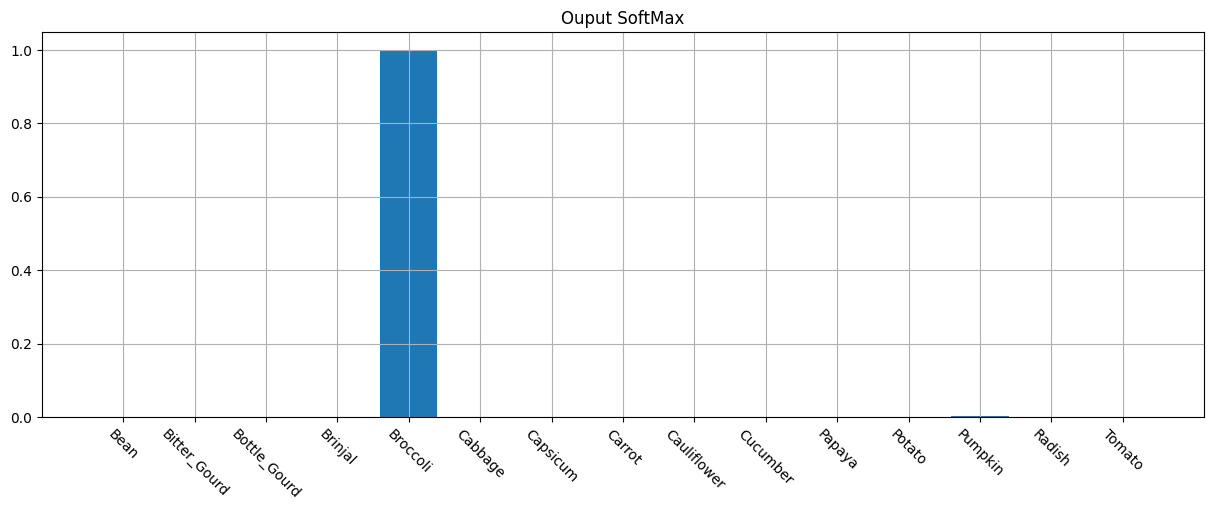

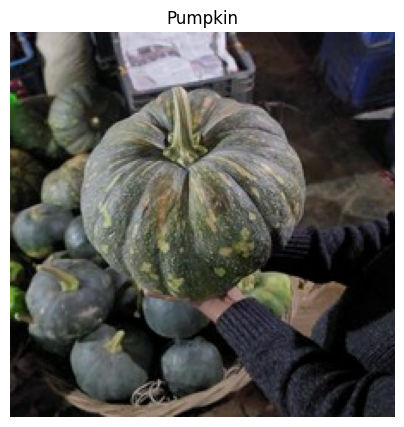

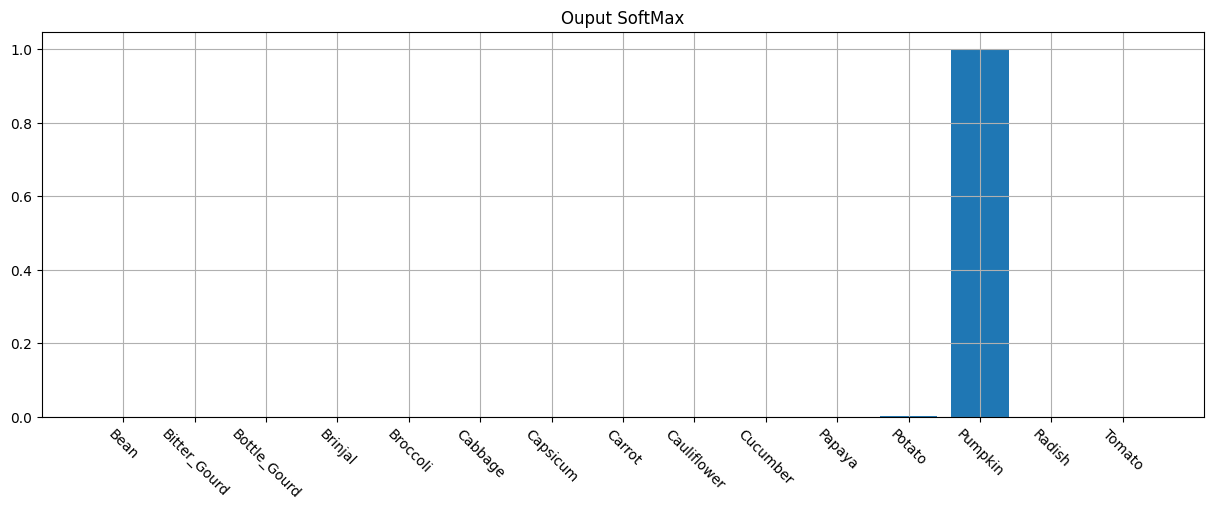

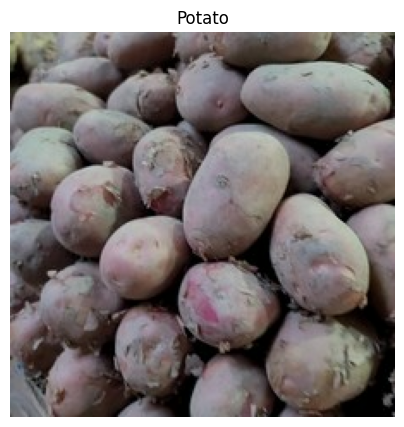

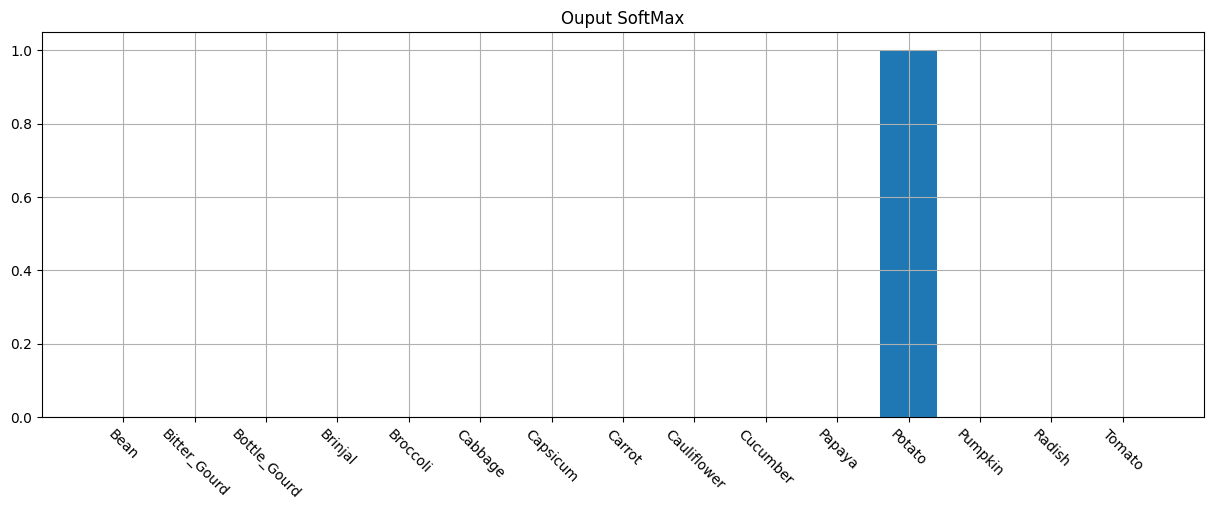

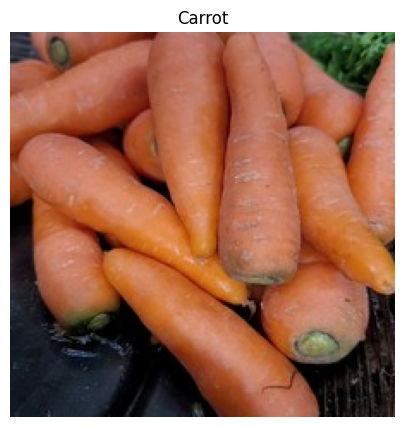

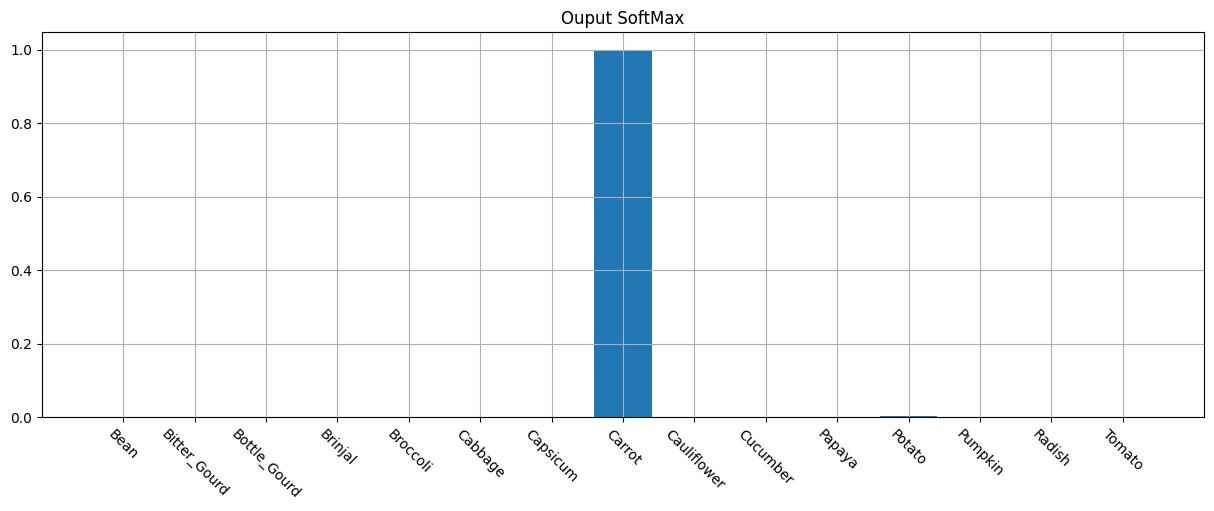

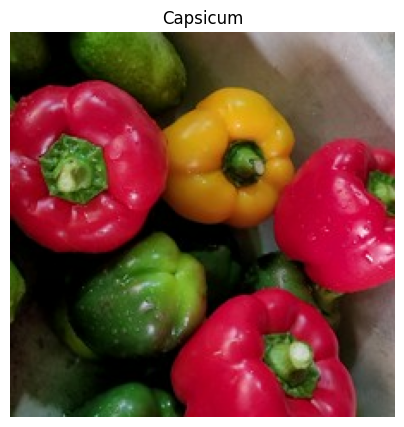

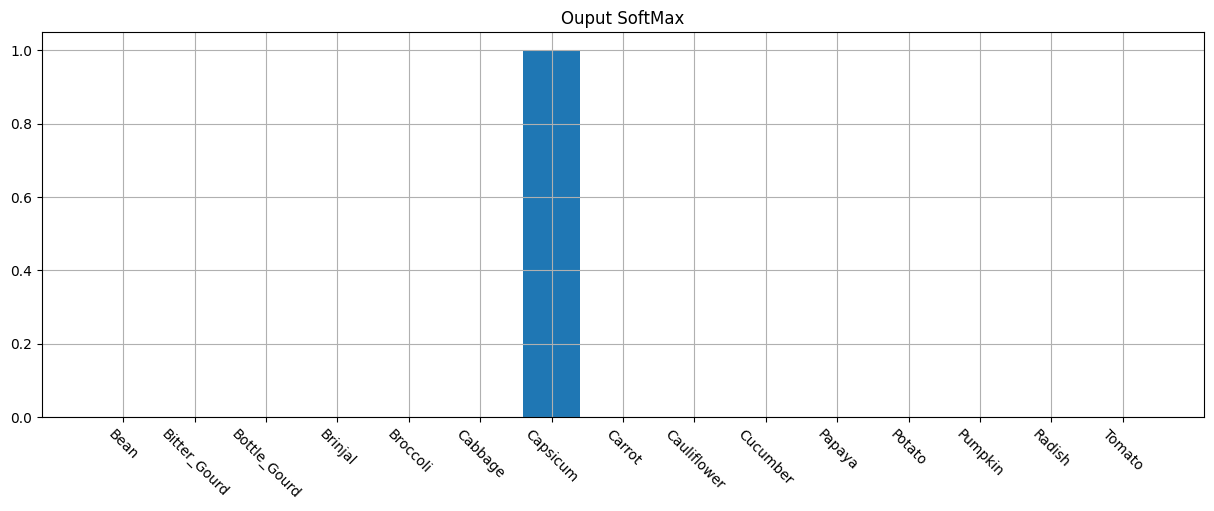

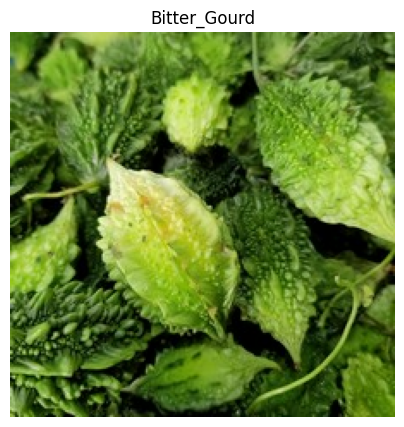

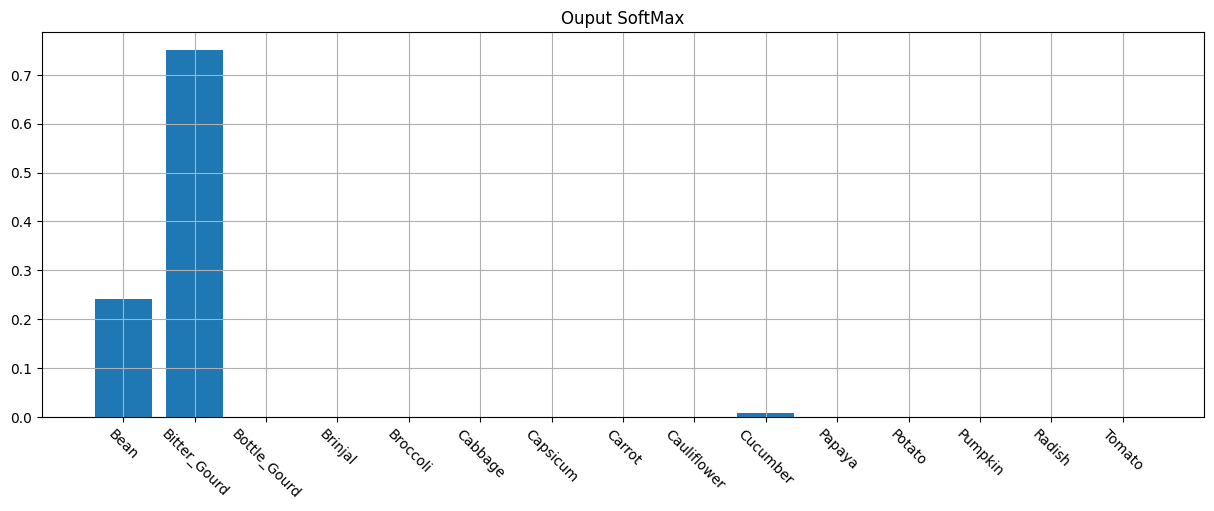

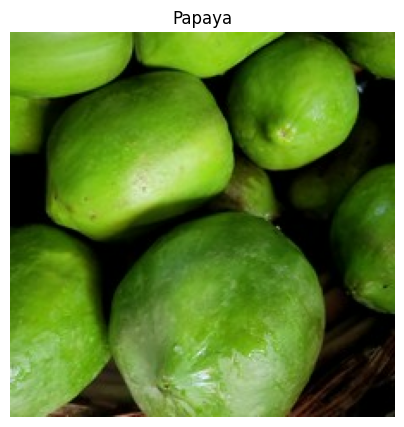

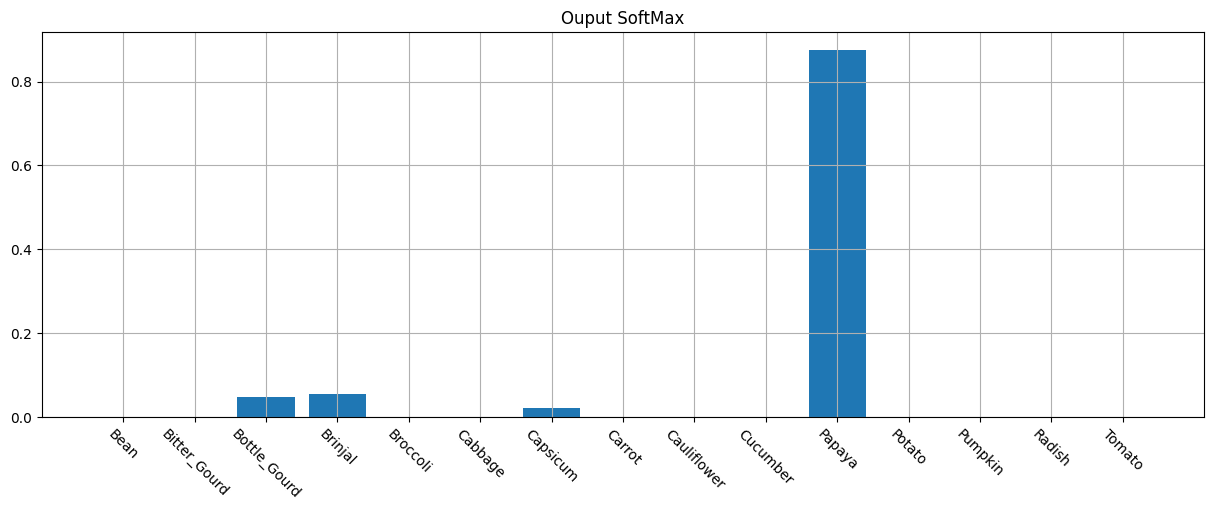

In [6]:
# Make some predictions
y_probs = test_model.predict(X)



names_class = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum',
               'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

for nr_item in range(len(y_probs)):

    pozitia = (tf.argmax(y_probs[nr_item])).numpy()
    
    # identifica numele clasei in functie de pozitie
    print()
    print()
    print()
    #print(names_class[pozitia])
    
    # ploteaza imaginea
    plt.figure(figsize=(5,5)) 
    plt.imshow(X[nr_item])
    plt.axis("off")
    plt.title(names_class[pozitia])
    plt.show()
    print()
    
    # plot SoftMax
    plt.figure(figsize=(15,5)) 
    plt.bar(names_class,y_probs[nr_item])
    plt.xticks(rotation=-45)
    plt.title('Ouput SoftMax')
    plt.grid()
    plt.show()